<a href="https://colab.research.google.com/github/thofes/SJ_distance/blob/main/2023_02_02_Yolo_OP_Coords_Mark1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Connect GDrive
from google.colab import drive
drive.mount('/content.gdrive')

#upload the weight file best_landing_flight.pt
#keypoints_from_image_finale uploaden
#plots.py updaten

#init Repository - YOLOv5
%cd /content


!git clone https://github.com/thofes/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install


#init Repository - OpenPose
import os
from os.path import exists, join, basename, splitext

#Change the drive to my mounted gdrive
%cd /content

git_repo_url = 'https://github.com/thofes/openpose'
project_name = splitext(basename(git_repo_url))[0]

if 1 or not exists(project_name):
  !rm -rf openpose
  # see: https://github.com/CMU-Perceptual-Computing-Lab/openpose/issues/949
  print("install new CMake becaue of CUDA10")
  cmake_version = 'cmake-3.20.2-linux-x86_64.tar.gz'
  if not exists(cmake_version):
    !wget -q 'https://cmake.org/files/v3.20/{cmake_version}'
  !tar xfz {cmake_version} --strip-components=1 -C /usr/local

  print("clone openpose")
  !git clone -q --depth 1 $git_repo_url
  print("install system dependencies")
  !apt-get -qq install -y libatlas-base-dev libprotobuf-dev libleveldb-dev libsnappy-dev libhdf5-serial-dev protobuf-compiler libgflags-dev libgoogle-glog-dev liblmdb-dev opencl-headers ocl-icd-opencl-dev libviennacl-dev
  print("build openpose")
  !cd openpose && rm -rf build || true && mkdir build && cd build && cmake .. && make -j`nproc`
  

Mounted at /content.gdrive
/content
Cloning into 'yolov5'...
remote: Enumerating objects: 13888, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 13888 (delta 0), reused 4 (delta 0), pack-reused 13884
Receiving objects: 100% (13888/13888), 25.96 MiB | 11.56 MiB/s, done.
Resolving deltas: 100% (9404/9404), done.
/content/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 57.6 MB/s eta 0:00:00
/content
install new CMake becaue of CUDA10
clone openpose
install system dependencies
Selecting previously unselected package libgflags2.2.
(Reading database ... 129501 files and directories currently installed.)
Preparing to unpack .../00-libgflags2.2_2.2.2-1build1_amd64.deb ...
Unpacking libgflags2.2 (2.2.2-1build1) ...
Selecting previously unselected package libgflags-dev.
Preparing to unpack .../01-libgflags-dev_2.2.2-1build1_amd64.deb ...
Unpacking libgflags-dev (2.2.2-1build1) ...
Selecting previously unselected packa

In [ ]:
%cd /content/yolov5
%pip install -qr requirements.txt  # install

/content/yolov5


In [4]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import subprocess

xx = '64'


landing_pic = "/content.gdrive/MyDrive/Präsentation_Ewoxx/" + xx


Path_Result = '/content.gdrive/MyDrive/Präsentation_Ewoxx/Results/' + xx
if os.path.isdir(Path_Result):
  print("Path exists")
else:
  os.mkdir(Path_Result)
  print("Path was not existing")


name = 'detections' 


#Landing and Flight
#subprocess.call(["python3", "detect_Auswertung.py", "--weights", "/home/thomas/yolov5/best_landing_flight.pt", "--name", name, "--save-crop", "--source", landing_pic, "--project", Path_Result, "--save-txt", "--max-det", "1", "--conf-thres", "0.8"])
%cd /content/yolov5
!python detect_Auswertung_final.py --weights "/content/yolov5/best_landing_flight.pt" --name {name} --save-crop --source {landing_pic} --project {Path_Result} --max-det 1 --conf-thres 0.8 --save-txt

  

Path = Path_Result


with open(Path + '/' + name + '/list.json', "r") as fp:
    data = json.load(fp)
  
conf = np.array(data["conf"])
index = np.array(data["index"])
cls = np.array(data["cls"])
x_center = np.array(data["x"])
y_center = np.array(data["y"])



index1 = []
conf1 = []
cls1 = []
index2 = []
conf2 = []
cls2 = []
index3 = []
conf3 = []
cls3 = []
index4 = []
conf4 = []
cls4 = []


#Für Ramsau
for i, x in enumerate(index):
    if x[0] == '1':
      conf1.append(conf[i])
      index1.append(x[2:])
      cls1.append(cls[i])
    elif x[0] == '2':
      conf2.append(conf[i])
      index2.append(x[2:])
      cls2.append(cls[i])
    elif x[0] == '3':
      conf3.append(conf[i])
      index3.append(x[2:])
      cls3.append(cls[i])
    elif x[0] == '4':
      conf4.append(conf[i])
      index4.append(x[2:])
      cls4.append(cls[i])
"""
#Für BHofen
for i, x in enumerate(index):
    if x[0] == '1':
      conf2.append(conf[i])
      index2.append(x[2:])
      cls2.append(cls[i])
    elif x[0] == '2':
      conf1.append(conf[i])
      index1.append(x[2:])
      cls1.append(cls[i])
    elif x[0] == '3':
      conf4.append(conf[i])
      index4.append(x[2:])
      cls4.append(cls[i])
    elif x[0] == '4':
      conf3.append(conf[i])
      index3.append(x[2:])
      cls3.append(cls[i])
"""



cams = [cls1, cls2, cls3, cls4]
indexes = [index1, index2, index3, index4]
detections = []
for idx, cam in enumerate(cams):
    lastcls = 9
    for i, c in enumerate(cam):
        if c == 1:
            lastcls = 1
        if c == 0 and lastcls == 1:
            detections.append(str(idx+1)+ "_" + indexes[idx][i])
            lastcls = 9
            break
    if len(detections) > 0:
        break



print("The Preselection would detect landings in following frames: ", detections)
 


index = data["index"].index(str(detections[0]))


dataset = {
      "path":[],
      "x":[],
      "y":[]
    }   
path_to_crop = Path + '/' + name + '/crops/Cam' + str(detections[0]) + '.jpg'
dataset["path"].append(path_to_crop)  
dataset["x"].append(data["x"][index])
dataset["y"].append(data["y"][index])

with open(Path + '/' + name + "/res.json", "w") as fp:
    json.dump(dataset, fp, indent=4)

Path_json = Path + '/' + name + "/res.json"

%cd /content/openpose/build/examples/tutorial_api_python
!python3 04_keypoints_from_images_finale.py --image_dir {Path_json} --keypoint_scale 0 --no_display true --write_images {Path_Result} #keypoint_scale 0für nicht normalisiert




Path exists
/content/yolov5
detect_Auswertung_final: weights=['/content/yolov5/best_landing_flight.pt'], source=/content.gdrive/MyDrive/Präsentation_Ewoxx/64, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.8, iou_thres=0.45, max_det=1, device=, view_img=False, save_txt=True, save_conf=False, save_crop=True, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/content.gdrive/MyDrive/Präsentation_Ewoxx/Results/64, name=detections, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.1-584-g96d894b Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/945 /content.gdrive/MyDrive/Präsentation_Ewoxx/64/Cam1_0000.jpg: 384x640 (no detections), 13.8ms
image 2/945 /content.gdrive/MyDrive/Präsentation_Ewoxx/64/Cam1_0001.jpg: 384x640 (no detections), 9.1ms
image 3/945

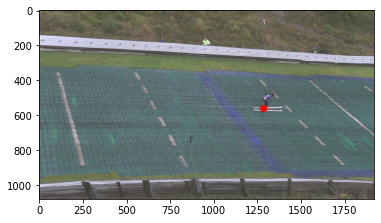

In [3]:
import matplotlib.pyplot as plt

# Bild laden
image = plt.imread(landing_pic + '/Cam2_0104.jpg')

# Größe des Bildes bestimmen
x_size, y_size = image.shape[1], image.shape[0]


# Bild anzeigen
plt.imshow(image)

#Koordinaten
FinaleX =  1282.6866607666016
FinaleY =  560.8596906661987


# Punkt auf dem Bild markieren
plt.scatter([FinaleX], [FinaleY], color='red')

# Anzeige
plt.show()


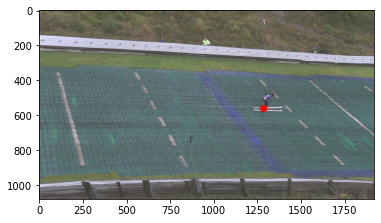

In [9]:
import matplotlib.pyplot as plt

# Bild laden
image = plt.imread(landing_pic + '/Cam2_0104.jpg')

# Größe des Bildes bestimmen
x_size, y_size = image.shape[1], image.shape[0]


# Bild anzeigen
plt.imshow(image)

#Koordinaten
FinaleX =  1282.6866607666016
FinaleY =  560.8596906661987


# Punkt auf dem Bild markieren
plt.scatter([FinaleX], [FinaleY], color='red')

# Anzeige
plt.show()


In [ ]:
import shutil

shutil.copytree('/content.gdrive/MyDrive/Vorselektion/B-Hofen_Samples/73', '/content.gdrive/MyDrive/Präsentation_Ewoxx/test')

'/content.gdrive/MyDrive/Präsentation_Ewoxx/test'